In [1]:
from pandas import read_csv 
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm
from scipy import stats
from statsmodels.graphics.api import qqplot

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [3]:
series.head()

month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: sales, dtype: float64

In [4]:
series.tail()

month
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: sales, dtype: float64

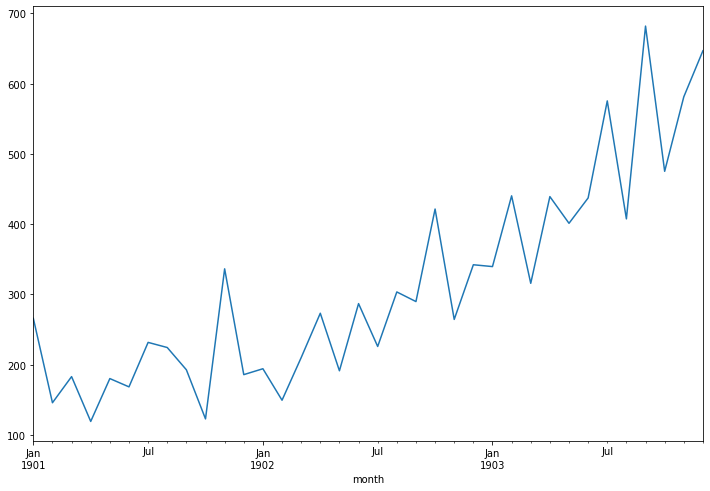

In [5]:
%matplotlib inline
series.plot(figsize=(12,8));

In [6]:
sm.stats.durbin_watson(series)

0.09548538187456361

<IPython.core.display.Javascript object>

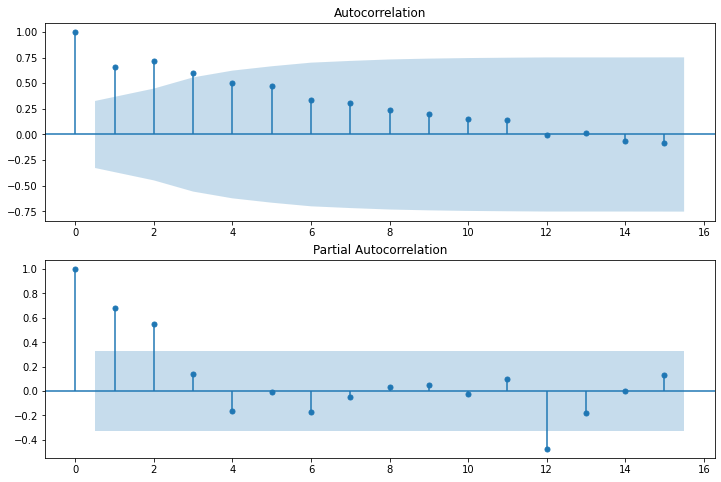

In [7]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series.values.squeeze(), lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series, lags=15, ax=ax2)

<IPython.core.display.Javascript object>

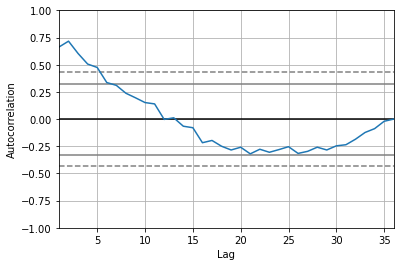

In [8]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()

In [9]:
training_data=series[0:18]
test_data=series[19:]

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [16]:
history = [x for x in training_data]
predictions = list()
for t in range(len(test_data)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_data, predictions)
print('Test MSE: %.3f' % error)

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=176.005137, expected=303.600000
predicted=259.597359, expected=289.900000
predicted=269.598204, expected=421.600000
predicted=305.448804, expected=264.500000
predicted=370.908326, expected=342.300000
predicted=330.531097, expected=339.700000
predicted=358.708509, expected=440.400000
predicted=369.377257, expected=315.900000
predicted=381.361817, expected=439.300000
predicted=366.631162, expected=401.300000
predicted=432.968413, expected=437.400000
predicted=412.360351, expected=575.500000
predicted=431.098006, expected=407.600000
predicted=517.019220, expected=682.000000
predicted=458.447823, expected=475.300000
predicted=630.443289, expected=581.300000
predicted=571.633116, expected=646.900000
Test MSE: 7043.753


In [17]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   33
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -185.303
Method:                       css-mle   S.D. of innovations             64.904
Date:                Mon, 25 Jan 2021   AIC                            384.607
Time:                        16:22:52   BIC                            395.082
Sample:                             1   HQIC                           388.131
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5577      4.037      2.863      0.004       3.646      19.469
ar.L1.D.y     -1.0608      0.185     -5.749      0.000      -1.423      -0.699
ar.L2.D.y     -0.5581      0.279     -1.998      0.046      -1.106      -0.011
ar.L3.D.y     -0.3112      0.298     -1.043      0.297      -0.896       0.274
ar.L4.D.y     -0.1240      0.277     -0.448      0.654      -0.667       0.419
ar.L5.D.y      0.1319      0.194      0.681      0.496      -0.248       0.511
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0453           -0.5222j            1.1685           -0.4263
AR.2           -1.0453           +0.5222j            1.1685            0.4263
AR.3            0.1127           -1.4023j            1.4068           -0.2372
AR.4            0.1127           +1.4023j            1.4068            0.2372
AR.5            2.8050           -0.0000j            2.8050           -0.0000
-----------------------------------------------------------------------------
"""

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
np.sqrt(mean_squared_error(test_data,predictions))

<IPython.core.display.Javascript object>

83.92706680408962

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

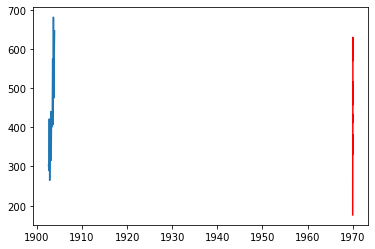

In [21]:
plt.plot(test_data)
plt.plot(predictions, color='red')
plt.show()